In [ ]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

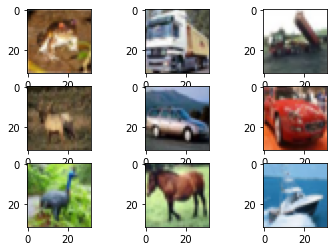

In [ ]:
import matplotlib.pyplot as plt
for i in range(9):
 plt.subplot(330+i+1) #lấy 3hang 3cot từ vị trí o trở đi
 plt.imshow(x_train[i])
plt.show()

In [ ]:
x_re=x_test
y_re=y_test
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test /= 255

In [ ]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
#tạo lớp ẩn
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2))) #tich chap 32 lan, (bo 3x3), ham truyen relu

In [ ]:
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x_train,y_train,batch_size=128,epochs=1000,verbose=1,validation_data=(x_test,y_test))

Epoch 1/1000
391/391 [==============================] - 5s 12ms/step - loss: 1.6181 - accuracy: 0.4100 - val_loss: 1.3569 - val_accuracy: 0.5260
Epoch 2/1000
391/391 [==============================] - 4s 11ms/step - loss: 1.1744 - accuracy: 0.5806 - val_loss: 1.0987 - val_accuracy: 0.6070
Epoch 3/1000
391/391 [==============================] - 4s 11ms/step - loss: 0.9727 - accuracy: 0.6568 - val_loss: 0.9945 - val_accuracy: 0.6542
Epoch 4/1000
391/391 [==============================] - 5s 12ms/step - loss: 0.8236 - accuracy: 0.7109 - val_loss: 0.8830 - val_accuracy: 0.6965
Epoch 5/1000
391/391 [==============================] - 5s 12ms/step - loss: 0.7145 - accuracy: 0.7509 - val_loss: 0.8582 - val_accuracy: 0.7035
Epoch 6/1000
391/391 [==============================] - 4s 11ms/step - loss: 0.6123 - accuracy: 0.7858 - val_loss: 0.8698 - val_accuracy: 0.7032
Epoch 7/1000
391/391 [==============================] - 5s 13ms/step - loss: 0.5095 - accuracy: 0.8209 - val_loss: 0.8976 - val_ac

In [ ]:
from keras.models import load_model
model.save('Final.h5')
model5=load_model('Final.h5')

tien doan: Bird


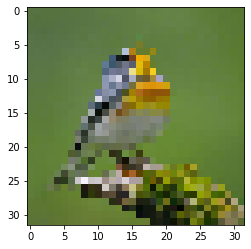

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img,img_to_array
import numpy as np
url = '/content/bird.jpeg'
img=load_img(url,target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
Label = ['Airplane', 'Automobile', 'Bird', 'Cat',
'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
A = np.argmax(model.predict(img),axis=1)
print("tien doan:",Label[int(A)])